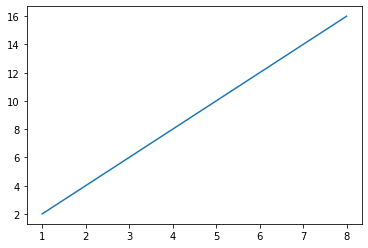

In [4]:
import matplotlib.pyplot as plt
x=[1,2,3,4,5,6,7,8]
y=[2,4,6,8,10,12,14,16]
plt.plot(x,y)
plt.show()